# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Build the query with the units and api key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
# Create empty lists to append the API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Initiate the counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
               
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hirara
Processing Record 2 | Punta Arenas
City not found. Skipping...
Processing Record 3 | San Carlos de Bariloche
City not found. Skipping...
City not found. Skipping...
Processing Record 4 | Iqaluit
Processing Record 5 | Bethel
Processing Record 6 | Rikitea
Processing Record 7 | Bayji
Processing Record 8 | Torbay
Processing Record 9 | Kodiak
Processing Record 10 | Mar del Plata
Processing Record 11 | Kenai
Processing Record 12 | Kruisfontein
Processing Record 13 | Ostrovnoy
Processing Record 14 | Bambous Virieux
Processing Record 15 | Chuy
Processing Record 16 | Broken Hill
Processing Record 17 | Richards Bay
Processing Record 18 | Mount Isa
Processing Record 19 | San Patricio
City not found. Skipping...
Processing Record 20 | Cienfuegos
Processing Record 21 | Nanortalik
City not found. Skipping...
Processing Record 22 | Kirakira
Processing Record 23 | Hermanus
Processing Record 24 | Busselton
City not fo

Processing Record 219 | Butaritari
Processing Record 220 | Hauterive
City not found. Skipping...
Processing Record 221 | Umm Kaddadah
Processing Record 222 | Ratnagiri
Processing Record 223 | Juneau
Processing Record 224 | Bahir Dar
Processing Record 225 | Owando
Processing Record 226 | Pemberton
Processing Record 227 | Punakha
City not found. Skipping...
City not found. Skipping...
Processing Record 228 | Hamilton
Processing Record 229 | Baykit
Processing Record 230 | Severo-Kurilsk
Processing Record 231 | Himatangi
Processing Record 232 | Isangel
Processing Record 233 | Mugumu
Processing Record 234 | Umea
Processing Record 235 | Nosy Varika
City not found. Skipping...
Processing Record 236 | Yinchuan
Processing Record 237 | North Bend
Processing Record 238 | Acari
Processing Record 239 | Vila Franca do Campo
Processing Record 240 | Nizhniy Ufaley
Processing Record 241 | Kloulklubed
City not found. Skipping...
Processing Record 242 | Neustadt
Processing Record 243 | Kiunga
Processing 

Processing Record 446 | Okhotsk
Processing Record 447 | Gergebil
City not found. Skipping...
Processing Record 448 | Mehamn
Processing Record 449 | Okato
Processing Record 450 | Ouegoa
Processing Record 451 | Udachnyy
City not found. Skipping...
Processing Record 452 | Saint-Pierre
Processing Record 453 | Selkirk
Processing Record 454 | Qostanay
Processing Record 455 | Saint-Augustin
Processing Record 456 | Harper
Processing Record 457 | Katsuura
Processing Record 458 | Igrim
Processing Record 459 | Havelock
Processing Record 460 | Husavik
Processing Record 461 | Kamaishi
Processing Record 462 | Chagoda
Processing Record 463 | Kaeo
Processing Record 464 | Asekeyevo
Processing Record 465 | San Ramon
Processing Record 466 | Xining
Processing Record 467 | Boende
City not found. Skipping...
Processing Record 468 | Effingham
Processing Record 469 | Bonavista
Processing Record 470 | Srednekolymsk
Processing Record 471 | Vung Tau
Processing Record 472 | Gouyave
Processing Record 473 | Cap-aux

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_data.count()

weather_data.to_csv(output_data_file,encoding="utf-8", index=False, header=True)


In [14]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hirara,75,JP,1562117372,79,24.80,125.28,87.8,20.80
1,Punta Arenas,75,CL,1562117374,87,-53.16,-70.91,33.8,14.99
2,San Carlos de Bariloche,75,AR,1562117379,74,-41.13,-71.31,37.4,14.99
3,Iqaluit,20,CA,1562117381,34,63.75,-68.52,42.8,6.93
4,Bethel,75,US,1562117382,82,60.79,-161.76,62.6,28.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

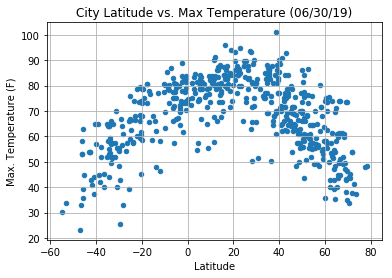

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (06/30/19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

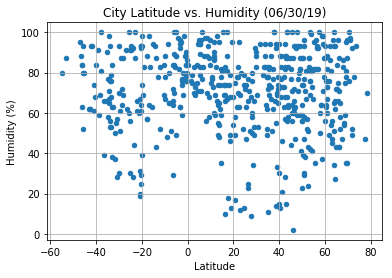

In [24]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (06/30/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

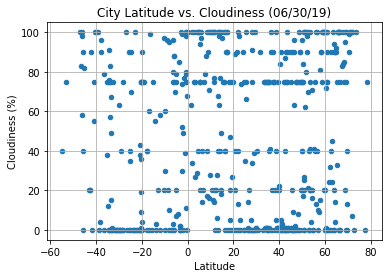

In [25]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (06/30/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

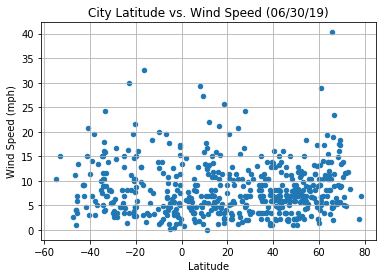

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (06/30/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()